<a href="https://colab.research.google.com/github/Rio-HEPLab/ML4Physics/blob/PPGF-2025-1/03-Building_Perceptron_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Adaptado de:
*https*://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/perceptron.py

## Perceptron


$\mathbf{x} = \begin{pmatrix} 1 \\ x_1 \\ x_2 \\ ... \\ x_m \end{pmatrix} , \quad \mathbf{w} = \begin{pmatrix} w_0 \\ w_1 \\ w_2 \\ ... \\ w_m \end{pmatrix}$

$ h( \mathbf{x}; \mathbf{w} ) = \left\{ \begin{array}{} 1 & , \quad \mathbf{w}^{T} \cdot \mathbf{x} > 0  \\ 0 & , \quad \mathbf{w}^{T} \cdot \mathbf{x} < 0 \end{array} \right. $

$ h( \mathbf{x}; \mathbf{w} ) = \Theta( \mathbf{w}^{T} \cdot \mathbf{x} ) $

$\Theta$: função Heaviside.

<img src="https://raw.githubusercontent.com/aayushmnit/Deep_learning_explorations/master/1_MLP_from_scratch/perceptron.png" align='center'> <br>




### Treinamento

Para um ponto classificado incorretamente ($h( \mathbf{x}_n; \mathbf{w} ) \neq y_n$):

$ \mathbf{w}^{i+1} = \left\{ \begin{array}{} \mathbf{w}^{i} + r \; \mathbf{x}_n & , \quad y_n = 1 \\ \mathbf{w}^{i} - r \; \mathbf{x}_n & , \quad y_n = 0 \end{array} \right. $

O algoritmo pode ser implementado por (para todos os pontos):

$ \mathbf{w}^{i+1} = \mathbf{w}^{i} + r \left[ y_n - h( \mathbf{x}_n; \mathbf{w} ) \right] \mathbf{x}_n $

$r$: "learning rate"

<br>
<figure>
<img src="https://raw.githubusercontent.com/Rio-HEPLab/ML4Physics/PPGF-2025-1/pics/Learning-from-Data-Perceptron-algo.png" align='center' width="500" height="500">
<figcaption> from: Learning from Data, Y. Abu-Mostafa </figcaption>
</figure>
<br>



## Implementing the Perceptron

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.activation_func = self._unit_step_func
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # add bias column to X
        X_ = np.c_[ np.ones( X.shape[0] ), X ]

        # convert if needed to label convention y = 0 or 1
        y_ = np.array( [ 1 if y_ > 0 else 0 for y_ in y ] )

        # init weights
        self.weights = np.zeros( X_.shape[1] )

        for _ in range( self.epochs ):

            for idx, x_i in enumerate( X_ ):

                linear_output = np.dot( x_i, self.weights )
                y_predicted = self.activation_func( linear_output )

                # Perceptron update rule
                update = self.lr * ( y_[idx] - y_predicted )

                self.weights += update * x_i

    def predict(self, X):
        # add bias column to X
        X_ = np.c_[ np.ones( X.shape[0] ), X ]

        linear_output = np.dot( X_, self.weights )
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


## Training

(200, 2) [[ 6.95754923e-01 -3.73669598e+00]
 [-1.76171349e-03 -1.11708690e+01]
 [-1.23421034e+00 -6.75714395e-01]
 [-3.08346032e+00 -8.47564228e+00]
 [-1.91873998e+00 -9.60807566e+00]
 [ 2.01294429e+00 -3.59598556e-01]
 [-3.41432823e+00 -7.88659712e+00]
 [-5.08063896e-01  1.33360546e+00]
 [ 1.87913559e+00 -2.49748259e+00]
 [-1.24956659e-01 -3.42101444e+00]
 [-1.33513619e+00  3.24602117e+00]
 [-8.00107089e-01 -3.30423939e+00]
 [-1.81549094e+00 -2.44217719e+00]
 [-9.54426758e-01 -1.06072307e+01]
 [ 1.98214979e-01 -1.13295293e+01]
 [ 3.05564304e+00 -1.19858699e+01]
 [ 3.46023839e+00 -3.10392954e+00]
 [-9.83986286e-02 -1.29383685e+01]
 [ 1.04419826e+00 -7.41106979e+00]
 [ 5.45489827e-01 -2.44506498e+00]
 [-2.40822632e-01 -9.39992536e+00]
 [-3.80029327e+00 -8.04274515e+00]
 [ 4.27961640e+00 -3.11390590e+00]
 [ 3.78450444e+00 -7.63666046e-01]
 [-4.33603705e-01 -9.26641827e+00]
 [-4.25426295e-01 -2.98838362e+00]
 [ 3.61667046e-01  4.08009000e+00]
 [ 6.27664334e-01 -3.12110071e+00]
 [-6.309293

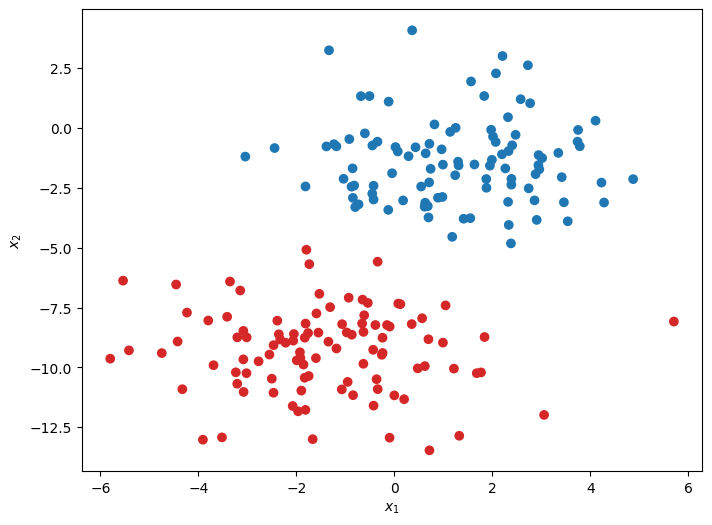

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Dataset
X, y = datasets.make_blobs(
    n_samples=250, n_features=2, centers=2, cluster_std=1.70, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print ( X_train.shape, X_train )
print ( y_train.shape, y_train )

def plot_data( X, y ):
    plt.scatter( X[:, 0], X[:, 1], marker="o", c=np.where( y == 1, 'tab:blue', 'tab:red' ) )
    plt.xlabel( r"$x_1$" )
    plt.ylabel( r"$x_2$" )

fig = plt.figure( figsize=(8,6) )
plot_data( X_train, y_train )

In [3]:
# Training
p = Perceptron(learning_rate=0.01, epochs=1000)
p.fit(X_train, y_train)

# Accuracy using test data set

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

predictions = p.predict(X_test)

print("Perceptron classification accuracy:", accuracy(y_test, predictions) )

Perceptron classification accuracy: 0.98


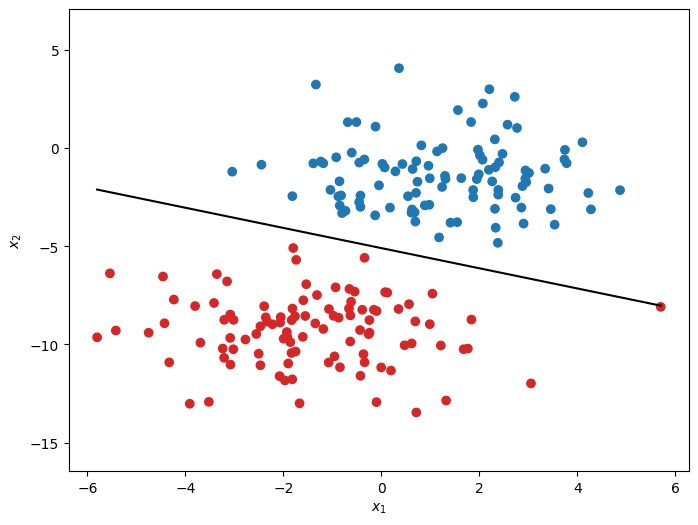

In [4]:
# Plot results
def plot_with_line( X, y ):
    # Line that intercepts the y = 0 plane
    x1_1 = np.amin(X_train[:, 0])
    x1_2 = np.amax(X_train[:, 0])
    x2_1 = (-p.weights[1] * x1_1 - p.weights[0]) / p.weights[2]
    x2_2 = (-p.weights[1] * x1_2 - p.weights[0]) / p.weights[2]

    plot_data( X, y )
    plt.plot( [x1_1, x1_2], [x2_1, x2_2], "k")
    x2_min = np.amin(X_train[:, 1])
    x2_max = np.amax(X_train[:, 1])
    plt.ylim([x2_min - 3, x2_max + 3])

fig = plt.figure( figsize=(8,6) )
plot_with_line( X_train, y_train )

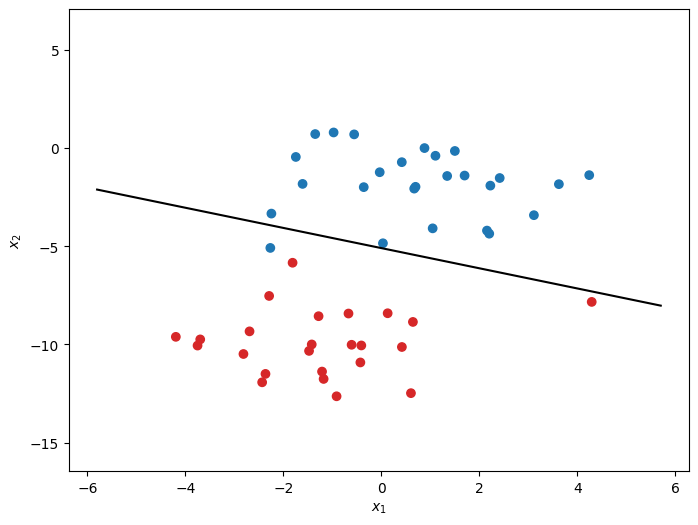

In [5]:
fig = plt.figure( figsize=(8,6) )
plot_with_line( X_test, y_test )